In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA


In [12]:
data = pd.read_csv("/content/UCI_Credit_Card.csv")

In [13]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
data.rename({"default.payment.next.month" : "default"} , axis='columns' , inplace= True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
data.drop('ID' , axis='columns' , inplace = True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#Missing data

In [19]:
data.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

In [20]:
data['SEX'].unique()

array([2, 1])

In [23]:
len(data.loc[(data["EDUCATION"] == 0)  | (data["MARRIAGE"] ==0)])

68

Remove missing values

In [24]:
data_updated = data.loc[(data["EDUCATION"] !=0 ) & (data["MARRIAGE"] != 0 )]

In [25]:
len(data_updated)

29932

#Down sample the data set

In [27]:
df_no_default = data_updated[data_updated["default"] == 0]
df_default = data_updated[data_updated["default"] != 0]

In [30]:
df_no_default_downsampled = resample(df_no_default,
                                     n_samples = 1000,
                                     replace = False,
                                     random_state = 42)
len(df_no_default_downsampled)

1000

In [31]:
df_default_downsampled = resample(df_default,
                                  n_samples= 1000,
                                  replace = False,
                                  random_state = 42)
len(df_default_downsampled)

1000

In [32]:
df_downsampled = pd.concat([df_no_default_downsampled , df_default_downsampled])
len(df_downsampled)

2000

# split the data into dependent and independent variables

In [33]:
X = df_downsampled.drop('default' , axis = 'columns').copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000.0,2,3,1,28,0,0,0,0,-2,...,50000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,410.0,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0


In [35]:
y = df_downsampled["default"].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: default, dtype: int64

#One hot encoding

In [36]:
X_encoded = pd.get_dummies(X , columns= ["SEX",
                                         "EDUCATION",
                                         "MARRIAGE",
                                         "PAY_0",
                                         "PAY_2",
                                         "PAY_3",
                                         "PAY_4",
                                         "PAY_5",
                                         "PAY_6",])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000.0,28,100143.0,50456.0,50000.0,0.0,0.0,0.0,2500.0,1000.0,...,0,1,0,0,0,0,0,0,0,0
4678,170000.0,29,165027.0,168990.0,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,...,0,0,0,1,0,0,0,0,0,0
16004,180000.0,29,25781.0,26000.0,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,...,0,0,0,1,0,0,0,0,0,0
22974,210000.0,32,355.0,975.0,410.0,0.0,0.0,0.0,979.0,412.0,...,0,1,0,0,0,0,0,0,0,0
17535,190000.0,45,76433.0,78472.0,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,...,0,0,0,1,0,0,0,0,0,0


#Train test split

In [37]:
X_train,X_test , y_train , y_test = train_test_split(X_encoded , y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# SVM building

In [38]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled , y_train)

SVC(random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


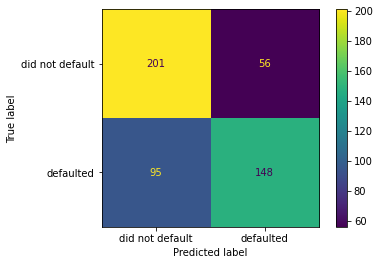

In [39]:
plot_confusion_matrix(clf_svm , 
                      X_test_scaled,
                      y_test,
                      values_format = 'd',
                      display_labels = ["did not default" , "defaulted"])

# optimizing parameters with crossvalidation and GridSearchCV

In [40]:
param_grid = [
              {'C':[0.5,1,10,100],
               'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
               'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring = 'accuracy', 
    verbose = 0
)

optimal_params.fit(X_train_scaled , y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


# building final model

In [41]:
clf_svm = SVC(random_state = 42 ,C = 100 , gamma=0.001 )
clf_svm.fit(X_train_scaled , y_train)

SVC(C=100, gamma=0.001, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


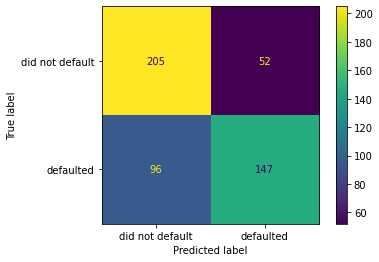

In [42]:
plot_confusion_matrix(clf_svm , 
                      X_test_scaled,
                      y_test,
                      values_format = 'd',
                      display_labels = ["did not default" , "defaulted"])

#Implementing PCA

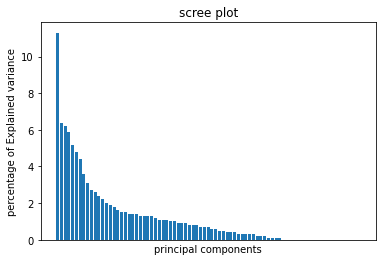

In [47]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100 , decimals =1)
labels = [str(x) for x in range (1, len(per_var)+1)]

plt.bar(x= range(1,len(per_var)+1), height= per_var)
plt.tick_params(
     axis = 'x',
     which = 'both',
     bottom=False,
     top = False,
     labelbottom = False)

plt.ylabel("percentage of Explained variance")
plt.xlabel("principal components")
plt.title("scree plot")
plt.show()